# Named-entity recognition
>  This chapter will introduce a slightly more advanced topic: named-entity recognition. You'll learn how to identify the who, what, and where of your texts using pre-trained models on English and non-English text. You'll also learn how to use some new libraries, polyglot and spaCy, to add to your NLP toolbox.

- toc: true 
- badges: true
- comments: true
- author: Lucas Nunes
- categories: [Python, Datacamp, Machine Learning]
- image: images/datacamp/1_supervised_learning_with_scikit_learn/2_regression.png

> Note: This is a summary of the course's chapter 3 exercises "Introduction to Natural Language Processing in Python" at datacamp. <br>[Github repo](https://github.com/lnunesAI/Datacamp/) / [Course link](https://www.datacamp.com/tracks/machine-learning-scientist-with-python)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 8)

## Named Entity Recognition

### NER with NLTK

<div class=""><p>You're now going to have some fun with named-entity recognition! A scraped news article has been pre-loaded into your workspace. Your task is to use <code>nltk</code> to find the named entities in this article. </p>
<p>What might the article be about, given the names you found?</p>
<p>Along with <code>nltk</code>, <code>sent_tokenize</code> and <code>word_tokenize</code> from <code>nltk.tokenize</code> have been pre-imported.</p></div>

In [74]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

article = '\ufeffThe taxi-hailing company Uber brings into very sharp focus the question of whether corporations can be said to have a moral character. If any human being were to behave with the single-minded and ruthless greed of the company, we would consider them sociopathic. Uber wanted to know as much as possible about the people who use its service, and those who don’t. It has an arrangement with unroll.me, a company which offered a free service for unsubscribing from junk mail, to buy the contacts unroll.me customers had had with rival taxi companies. Even if their email was notionally anonymised, this use of it was not something the users had bargained for. Beyond that, it keeps track of the phones that have been used to summon its services even after the original owner has sold them, attempting this with Apple’s phones even thought it is forbidden by the company.\r\n\r\n\r\nUber has also tweaked its software so that regulatory agencies that the company regarded as hostile would, when they tried to hire a driver, be given false reports about the location of its cars. Uber management booked and then cancelled rides with a rival taxi-hailing company which took their vehicles out of circulation. Uber deny this was the intention. The punishment for this behaviour was negligible. Uber promised not to use this “greyball” software against law enforcement – one wonders what would happen to someone carrying a knife who promised never to stab a policeman with it. Travis Kalanick of Uber got a personal dressing down from Tim Cook, who runs Apple, but the company did not prohibit the use of the app. Too much money was at stake for that.\r\n\r\n\r\nMillions of people around the world value the cheapness and convenience of Uber’s rides too much to care about the lack of drivers’ rights or pay. Many of the users themselves are not much richer than the drivers. The “sharing economy” encourages the insecure and exploited to exploit others equally insecure to the profit of a tiny clique of billionaires. Silicon Valley’s culture seems hostile to humane and democratic values. The outgoing CEO of Yahoo, Marissa Mayer, who is widely judged to have been a failure, is likely to get a $186m payout. This may not be a cause for panic, any more than the previous hero worship should have been a cause for euphoria. Yet there’s an urgent political task to tame these companies, to ensure they are punished when they break the law, that they pay their taxes fairly and that they behave responsibly.'

#nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

Instructions
<ul>
<li>Tokenize <code>article</code> into sentences.</li>
<li>Tokenize each sentence in <code>sentences</code> into words using a list comprehension.</li>
<li>Inside a list comprehension, tag each tokenized sentence into parts of speech using <code>nltk.pos_tag()</code>.</li>
<li>Chunk each tagged sentence into named-entity chunks using <code>nltk.ne_chunk_sents()</code>. Along with <code>pos_sentences</code>, specify the additional keyword argument <code>binary=True</code>.</li>
<li>Loop over each sentence and each chunk, and test whether it is a named-entity chunk by testing if it has the attribute <code>label</code>, and if the <code>chunk.label()</code> is equal to <code>"NE"</code>. If so, print that chunk.</li>
</ul>

In [16]:
# Tokenize the article into sentences: sentences
sentences = sent_tokenize(article)

# Tokenize each sentence into words: token_sentences
token_sentences = [word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)

(NE Uber/NNP)
(NE Beyond/NN)
(NE Apple/NNP)
(NE Uber/NNP)
(NE Uber/NNP)
(NE Travis/NNP Kalanick/NNP)
(NE Tim/NNP Cook/NNP)
(NE Apple/NNP)
(NE Silicon/NNP Valley/NNP)
(NE CEO/NNP)
(NE Yahoo/NNP)
(NE Marissa/NNP Mayer/NNP)


### Charting practice

<div class=""><p>In this exercise, you'll use some extracted named entities and their groupings from a series of newspaper articles to chart the diversity of named entity types in the articles.</p>
<p>You'll use a <code>defaultdict</code> called <code>ner_categories</code>, with keys representing every named entity group type, and values to count the number of each different named entity type. You have a chunked sentence list called <code>chunked_sentences</code> similar to the last exercise, but this time with non-binary category names.</p>
<p>You can use <code>hasattr()</code> to determine if each chunk has a <code>'label'</code> and then simply use the chunk's <code>.label()</code> method as the dictionary key.</p></div>

In [72]:
from collections import defaultdict
article = '\ufeffImage copyright EPA Image caption Uber has been criticised many times over the way it runs its business\r\n\r\n\r\nRide-sharing firm Uber is facing a criminal investigation by the US government.\r\n\r\n\r\nThe scrutiny has started because the firm is accused of using "secret" software that let it operate in regions where it was banned or restricted.\r\n\r\n\r\nThe software, called "greyball", helped it identify officials seeking to stop the service running.\r\n\r\n\r\nA spokesman for Uber declined to comment on the investigation, reported the Reuters news agency.\r\n\r\n\r\nIt is claimed greyball was used in several areas, including Portland, Oregon, where the ride service was still seeking official approval to operate.\r\n\r\n\r\nBookings blocked\r\n\r\n\r\nIn those areas, transport regulation officials posed as passengers in a bid to prove that the company was operating illegally. Greyball worked out who the officials were and blocked them from booking rides with the company\'s drivers.\r\n\r\n\r\nIn a letter sent last week to transport regulators in Portland, Uber said it used the greyball software "exceedingly sparingly" in the city and had not used it since April 2015 when it was granted permission to operate.\r\n\r\n\r\nUber\'s use of the software was revealed by the New York Times earlier this year. Uber defended its use in a blog saying the software helped it work out if a ride request was legitimate. It helped Uber limit fraud and protect drivers from harm, it added.\r\n\r\n\r\nIt is not clear what sanctions Uber will face if the investigation finds that it did act illegally.\r\n\r\n\r\nThe criminal inquiry comes at a difficult time for Uber which has faced criticism on many fronts. It is currently fighting a lawsuit from Google-backed self-driving car firm Waymo.Despite all the current hype about the rise of voice-assisted devices using Alexa and Siri, linguistics researcher Rachael Tatman found people complaining on social media that the technology still doesn’t understand them.\r\n\r\n\r\nThat’s especially true with regional accents of people who live in the South or are from countries like New Zealand, Tatman said last week during a conference in San Francisco.\r\n\r\n\r\n“So this is the whatever the opposite of delight is as a user experience,” she said. “People are so upset that they’re going on Twitter and yelling about it.”\r\n\r\n\r\nTatman, a doctoral candidate with the University of Washington’s linguistics department, was one of the speakers at a two-day Virtual Assistant Summit, which wrapped up Friday at the Park Central Hotel. The conference, and an adjacent Deep Learning Summit, drew about 600 people representing companies that are working on advancing artificial intelligence, machine learning and robotics.\r\n\r\n\r\nLots of people are already using those technologies in programs like Apple’s Siri. They are moving beyond mobile phones and into smart-home devices like Amazon’s Echo. Other fast-changing technologies include artificial intelligence and consumer robotics, especially with self-driving cars on the horizon.\r\n\r\n\r\nBut there’s still work to be done in each of those areas, speakers said. For example, artificial speech recognition technologies still fall short of the way humans can quickly learn and discern speech patterns from each other in “as little as two sentences,” Tatman said.\r\n\r\n\r\nBut that’s because humans take into account other factors, such as the gender of person talking or whether they’ve previously met someone from the the same region, she said.\r\n\r\n\r\nTatman examined YouTube’s automatic captioning program, which can translate spoken words into text in several languages. She found that more errors showed up in translations from speakers who had a Southern accent than from people who lived in California.\r\n\r\n\r\n“The South is the largest demographic region in the United States,” she said. “If you’re using a voice-based virtual assistant and you can’t deal with Southern speech, you’re going to have problems reaching this market.”\r\n\r\n\r\nFor businesses trying to serve those markets, speech recognition technology could be crucial to future revenue, said Stephen Scarr, CEO of search services Info.com and eContext.\r\n\r\n\r\nWith 20 percent of all searches already done through voice, “this is really important, this is No. 1 on your radar,” Scarr told the developers.\r\n\r\n\r\nAs an example of the challenge, a recent YouTube video showed Amazon’s Alexa misunderstanding a young boy’s request to play a song, and instead offering to play an audio porn channel.\r\n\r\n\r\nThe conference touched on more than just speech technologies. Alonso Martinez, a Pixar Animation Studios technical director, said robot developers could take cues from the ways animators create deep emotional connections with audiences.\r\n\r\n\r\n“When you’re thinking about a robot, don’t think about it as a generic, faceless thing,” said Martinez, who developed characters in “Up” and “Inside Out,” two of the Emeryville company’s hit movies. “You need to ask what makes them admirable. What are the values that they have that I wish that I had in myself?”\r\n\r\n\r\nElena Corina Grigore of Yale University’s Social Robotics Lab said robots now used in manufacturing can work by themselves because they are easily trained to perform specialized, repetitive tasks. But robots are not well-equipped to collaborate with humans, she said.\r\n\r\n\r\nThat’s slowly changing with advances in artificial intelligence. As an example, Grigore played a video of a robot trained to help a person with what can be a complex and maddening task — assembling a chair from Ikea.\r\n\r\n\r\nStill, Grigore said, “We’re not getting replaced by robots anytime soon. We’re not at a point where the robots have the intelligence or the physical capabilities necessary to perform all of these actions on their own. Anything that is related to common sense or creativity or types of thinking that require on-the-spot flexibility in a dynamic and changing environment is still very hard to achieve for us.”\r\n\r\n\r\nBenny Evangelista is a San Francisco Chronicle staff writer. Email: bevangelista@sfchronicle.com Twitter: @ChronicleBenny The French electorate heads to the polls in the second round of presidential elections on May 7, followed by votes in Britain and Germany in the coming months. Computer scientists, tech giants and start-ups are using sophisticated algorithms and reams of online data to quickly — and automatically — spot fake news faster than traditional fact-checking groups can.\r\n\r\n\r\nAdvertisement Continue reading the main story\r\n\r\n\r\nThe goal, experts say, is to expand these digital tools across Europe, so the region can counter the fake news that caused so much confusion and anger during the United States presidential election in November, when outright false reports routinely spread like wildfire on Facebook and Twitter.\r\n\r\n\r\n“Algorithms will have to do a lot of the heavy lifting when it comes to fighting misinformation,” said Claire Wardle, head of strategy and research at First Draft News, a nonprofit organization that has teamed up with tech companies and newsrooms to debunk fake reports about elections in the United States and Europe. “It’s impossible to do all of this by hand.”\r\n\r\n\r\nResearchers have tried to learn from the United States’ run-in with fake news, but the problem in Europe has mutated, experts say, making it impossible to merely replicate American responses to the issue.\r\n\r\n\r\nAdvertisement Continue reading the main story\r\n\r\n\r\nEuropean countries have different languages, and their media markets are smaller than those in the United States. That means groups that set up fake news sites in the United States, seeking to profit from online advertising when false claims were shared on social media, are less prevalent in Europe.\r\n\r\n\r\nAdvertisement Continue reading the main story\r\n\r\n\r\nSo far, outright fake news stories have been relatively rare. Instead, false reports have more often come from Europeans on social media taking real news out of context, as well as from fake claims spread by state-backed groups like Sputnik, the Russian news organization.\r\n\r\n\r\nAdvertisement Continue reading the main story\r\n\r\n\r\nBut with fake news already swirling around Europe’s forthcoming elections, analysts also worry that technology on its own may not be enough to combat the threat.\r\n\r\n\r\n“There’s an increased amount of misinformation out there,” said Janis Sarts, director of the NATO Strategic Communications Center of Excellence, a think tank in Riga, Latvia, that will hold a hackathon with local coders in May to find potential tech solutions to this trend. “State-based actors have been trying to amplify specific views to bring them into the mainstream.”\r\n\r\n\r\nCalls for combating fake news have focused on some of the biggest online players, including American giants like Facebook and Google.\r\n\r\n\r\nInterested in all things tech? The daily Bits newsletter will keep you updated on the latest from Silicon Valley and the technology industry, plus exclusive analysis from our reporters and editors. Please verify you\'re not a robot by clicking the box. Invalid email address. Please re-enter. You must select a newsletter to subscribe to. Sign Up Receive occasional updates and special offers for The New York Times\'s products and services. Thank you for subscribing. An error has occurred. Please try again later. View all New York Times newsletters.\r\n\r\n\r\nAfter criticism of its role in spreading false reports during the United States elections, Facebook introduced a fact-checking tool ahead of the Dutch elections in March and the first round of the French presidential election on April 23. It also removed 30,000 accounts in France that had shared fake news, a small fraction of the approximately 33 million Facebook users in the country.\r\n\r\n\r\nPhoto\r\n\r\n\r\nNot everyone, though, has embraced Facebook’s response.\r\n\r\n\r\nMost German publishers, for instance, have so far balked at participating in the company’s fact-checking efforts, saying it is the responsibility of the social network, not them, to debunk such claims. German lawmakers are mulling potential hefty fines against tech companies if they do not clamp down on fake news and online hate speech.\r\n\r\n\r\nAdvertisement Continue reading the main story\r\n\r\n\r\nSince last year, Google also has funded almost 20 European projects aimed at fact-checking potentially false reports. That includes its support for two British groups looking to use artificial intelligence to automatically fact-check online claims ahead of the country’s June 8 parliamentary election.\r\n\r\n\r\nAdvertisement Continue reading the main story\r\n\r\n\r\nIt similarly has teamed up with French newsrooms to create digital tools, including ways to track trending topics during that country’s election.\r\n\r\n\r\nDavid Dieudonné, head of the company’s news lab in France, said the project had debunked 43 reports since February (arguably a relatively small figure), including claims that Saudi Arabia was funding the campaign of Emmanuel Macron, the leading candidate.\r\n\r\n\r\nAdvertisement Continue reading the main story\r\n\r\n\r\n“We’re trying something new,” Mr. Dieudonné said. “There’s no easy answer for this complicated issue.”\r\n\r\n\r\nNot all potential solutions, though, are being driven by Silicon Valley’s big beasts.\r\n\r\n\r\nDavid Chavalarias, a French academic, has created a digital tool that has analyzed more than 80 million Twitter messages about the French election, helping journalists and fact-checkers to quickly review claims that are spread on the social network.\r\n\r\n\r\nAdvertisement Continue reading the main story\r\n\r\n\r\nAfter the presidential election in the United States last year, Dean Pomerleau, a computer scientist at Carnegie Mellon University in Pittsburgh, also challenged his followers on Twitter to come up with an algorithm that could distinguish fake claims from real news.\r\n\r\n\r\nAdvertisement Continue reading the main story\r\n\r\n\r\nWorking with Delip Rao, a former Google researcher, he offered a $2,000 prize to anyone who could meet his requirements. By early this year, more than 100 teams from around the world had signed on to Mr. Pomerleau’s Fake News Challenge.\r\n\r\n\r\nUsing a database of verified articles and their artificial intelligence expertise, rival groups — a combination of college teams, independent programmers and groups from existing tech companies — already have been able to accurately predict the veracity of certain claims almost 90 percent of the time, Mr. Pomerleau said. He hopes that figure will rise to the mid-90s before his challenge ends in June.\r\n\r\n\r\nAdvertisement Continue reading the main story\r\n\r\n\r\n“This is just Round 1 of what we want to do,” said Mr. Pomerleau, who expects the teams to share their work with fact-checking groups worldwide. “Next, we want to move toward multimedia content like videos.”\r\n\r\n\r\nAdvertisement Continue reading the main story\r\n\r\n\r\nIn the rush to find solutions to fake news, some within the industry are taking a decidedly more low-tech approach.\r\n\r\n\r\nJimmy Wales, the founder of Wikipedia, recently started a crowdfunding campaign to create a news organization that would combine professional journalists with digital volunteers, who would contribute to reports in a way similar to how articles are created on Wikipedia.\r\n\r\n\r\nPart fact-checking site, part traditional newsroom, the project — called Wikitribune — was inspired by the effect of misinformation on the United States presidential election. Mr. Wales said his project would choose subject areas based on the interests of the community of volunteers and paying subscribers to the service, relying more on traditional reporting techniques than high-tech wizardry.\r\n\r\n\r\nAdvertisement Continue reading the main story\r\n\r\n\r\n“The real impetus for this was fake news,” he said. “We want people to get behind topics, and then we’ll hire staff to cover them.” Ruchir Sharma, chief global strategist at Morgan Stanley Investment Management, is the author of “The Rise and Fall of Nations: Forces of Change in the The Post-Crisis World,” from which this essay is adapted.\r\n\r\n\r\n\r\n\r\n\r\n\r\nA robot collects dishes to be cleaned at Chilli Padi Nonya Cafe in Singapore. (REUTERS/Edgar Su)\r\n\r\n\r\nThe United Nations forecasts that the global population will rise from 7.3 billion to nearly 10 billion by 2050, a big number that often prompts warnings about overpopulation. Some have come from neo-Malthusians, who fear that population growth will outstrip the food supply, leaving a hungry planet. Others appear in the tirades of anti-immigrant populists, invoking the specter of a rising tide of humanity as cause to slam borders shut. Still others inspire a chorus of neo-Luddites, who fear that the “rise of the robots” is rapidly making human workers obsolete, a threat all the more alarming if the human population is exploding.\r\n\r\n\r\nBefore long, though, we’re more likely to treasure robots than to revile them. They may be the one thing that can protect the global economy from the dangers that lie ahead.\r\n\r\n\r\nAn increase of 2.5 billion people may sound catastrophic. But what matters for economic growth is not the number of people but the rate of population growth. Since its peak in the 1960s, that rate has slumped by almost half to just 1 percent, and the U.N. forecast assumes that this slowdown will continue. Women are having fewer children, so fewer people are entering the working ages between 15 and 64, and labor-force growth is poised to decline from Chile to China. At the same time, owing to rapid advances in health care and medicine, people are living longer , and most of the coming global population increase will be among the retirement crowd. These trends are toxic for economic growth, and boosting the number of robots may be the easiest answer for many countries.\r\n\r\n\r\nOne simple way to estimate how fast an economy can grow is by adding working-age population growth and productivity growth: If the number of workers and output per worker are both increasing by 1 percent a year, then economic output should rise by roughly 2 percent. Over the past decade, both sides of that equation have declined dramatically across the world. In the United States, productivity growth has fallen by almost half from its postwar average, but growth in the labor force has slid even faster, dropping by two-thirds to an average pace of 0.5 percent, according to calculations performed for my book. Though many explanations have been offered for the slow recovery from the global financial crisis of 2008, the clearest answer may be aging populations. Something will have to fill the void left by, say, retiring farmers, and particularly at a time of rising hostility to immigrants, it is likely to be farmbots.\r\n\r\n\r\nIt may not be long before economists are worrying about a global shortage of robots. In many industrial countries, from Germany to Japan to South Korea, growth in the working-age population has already peaked, acting as a drag on the economy. Widely overlooked, however, is the fact that the population-growth slowdown is unfolding even faster in the emerging world, according to my research.\r\n\r\n\r\nConsider the turning point that China hit last year. For the first time since records began in the 1950s, its working-age population growth was negative. As a result, China’s labor force is expected to lose 1 million workers each year for the foreseeable future, and it is also aging rapidly. Studies by Evercore ISI, a research firm, show that the elderly share of the population is rising more than twice as fast as it did in the United States and more than four times faster than in France at similar stages of development. Asked by an alarmed dinner companion about the threat robots posed to jobs in China, Nobel economist Daniel Kahneman responded: “You just don’t get it. In China, the robots are going to come just in time.” No wonder Beijing now offers heavy subsidies to companies involved in industrial automation.\r\n\r\n\r\nAnd timing is critical. Those who fear the job-destroying impact of machines say this generation of technology is different because it is coming so fast. If older generations created tools for use by humans, such as sewing machines, the new forms of automation are imbued with artificial intelligence, capable of “machine learning” and of rapidly replacing humans in a broad swath of jobs, from manufacturing to services — even jobs that involve writing about robots. Concern about this disruptive advance has been stirred up by authorities such as Oxford University researchers Carl Benedikt Frey and Michael Osborne, who predicted in 2013 that nearly half of U.S. jobs would be at risk from automation in the next decade or two.\r\n\r\n\r\nThese alarms have sounded before, however. The Machine Intelligence Research Institute at the University of California at Berkeley has found that today, the average forecast for when artificial intelligence will arrive is about 20 years. But that was also the standard prediction in 1955. And often, humans find a way of working with their automated creations. After the introduction of supermarket scanners, the number of cashiers grew. Though legal-discovery software appeared to threaten the jobs of paralegals, their ranks increased, too. Now, many fear that self-driving trucks will displace millions of American truckers, but they may create more and better jobs for those who service those increasingly complex vehicles.\r\n\r\n\r\nIf automation was displacing human workers as fast as implied in recent books like Martin Ford’s “The Rise of the Robots,” then we should be seeing a negative impact on jobs already. We’re not. Since 2008, economic growth has been weak compared with that in other post-crisis recoveries, but job growth in the major industrial countries has been relatively strong. In the Group of Seven, the world’s top industrial countries, unemployment has fallen faster than expected in the face of weak economic growth, and faster than in any comparable period since at least the 1970s. The Japanese economy is growing at 0.8 percent, yet it is at full employment. According to my research, the job picture has been particularly strong in Germany, Japan and South Korea — the industrial countries that employ the most robots .\r\n\r\n\r\nTrue, robots do represent a new obstacle for some poorer nations, namely those few that do not suffer from population decline. In the postwar era, countries like China escaped poverty by moving a rising young population off the farm and into more productive jobs in factories. Indeed, it was unusual for any country to sustain rapid growth unless the working-age population was increasing faster than 2 percent a year. My analysis shows that, in the 1980s, 17 of the 20 largest emerging economies had a working-age population expanding that fast, according to my research, but now there are only two: Nigeria and Saudi Arabia. And they will have a hard time moving a large segment of their young populations into industrial jobs, given that they now have to compete with robotic manufacturing elsewhere.\r\n\r\n\r\nYet for the rising number of countries facing population decline, the effort to lift the labor force has begun. Starting in the 1980s, led by Singapore, nations from Chile to Australia have offered baby bonuses for women to have more children, but many have found that these bonuses are ineffective in the face of stronger cultural forces, including the desire of many women to pursue a career before having children. Others have tried with some success to boost the workforce directly by raising the retirement age, offering women incentives to join or return to the labor force after having kids, and opening doors to immigrant workers.\r\n\r\n\r\nThe simple math, however, shows that particularly in rapidly aging, conservative societies such as Japan and Germany, none of these groups has the potential to make up for coming declines in the working-age population. Germany decided to admit roughly 1 million refugees in 2015, in part for economic reasons, but the resulting controversy has reduced the flow. Germany would have to admit 1.5 million each year through 2030 to fully offset the economic impact of its aging population. Japan, which on average admits fewer than 70,000 immigrants per year, would have to admit 1 million annually. Given the widespread political backlash against immigration, increases this large are unlikely.\r\n\r\n\r\nSo far, robots are drawing comparatively little populist fire, perhaps in part because their numbers are still quite low. Worldwide, the industrial labor force includes about 320 million humans, compared with just 1.6 million robots. That’s a huge gap, even counting the superior strength and speed of the robots. And most of them fall in the category of unintelligent machines, committed to a single task such as turning a bolt or painting a car door. Nearly half of them work in the auto industry, which is still the largest employer (of humans) in the United States.\r\n\r\n\r\nIn the future, economists may start counting robots the way they now count gains in the working-age population, as a driver of growth. For much of the world, robots will stand alongside immigrants, women and the elderly as a fourth pool of labor.\r\n\r\n\r\nWhether by design or accident, many of the countries with the most rapidly aging populations already have the most robots. According to the International Federation of Robotics, the nations with the highest density of industrial robots include South Korea, with 531 per 10,000 employees, Japan with 305 and Germany with 301. The United States ranks eighth with 176. China is well behind with only 49, but on the bright side — arguably — it had the world’s fastest-growing robot population.\r\n\r\n\r\nToday, population trends are the most powerful force shaping the rise and fall of nations, the starting point of any discussion about an economy’s prospects. Most of the world is graying fast, and the economic answer to aging will be all hands on deck, no matter what they’re made of. Researchers describe the ‘emotional chatting machine’ as a first attempt at the problem of creating machines that can fully understand user emotion\r\n\r\n\r\nAn “emotional chatting machine” has been developed by scientists, signalling the approach of an era in which human-robot interactions are seamless and go beyond the purely functional.\r\n\r\n\r\nThe chatbot, developed by a Chinese team, is seen as a significant step towards the goal of developing emotionally sophisticated robots.\r\n\r\n\r\nThe ECM, as it is known for short, was able to produce factually coherent answers whilst also imbuing its conversation with emotions such as happiness, sadness or disgust.\r\n\r\n\r\nProf Björn Schuller, a computer scientist at Imperial College London who was not involved in the latest advance, described the work as “an important step” towards personal assistants that could read the emotional undercurrent of a conversation and respond with something akin to empathy.\r\n\r\n\r\n“This will be the next generation of intelligence to be met in daily experience, sooner rather than later,” he said.\r\n\r\n\r\nThe paper found that 61% of humans who tested the machine favoured the emotional versions to the neutral chatbot. Similar results have been found in so-called “Wizard of Oz” studies in which a human typing responses masquerades as advanced AI.\r\n\r\n\r\n“It is not a question whether they are desirable – they clearly are – but in which applications they make sense and where they don’t,” said Schuller.\r\n\r\n\r\nMinlie Huang, a computer scientist at Tsinghua University, Beijing and co-author, said: “We’re still far away from a machine that can fully understand the user’s emotion. This is just the first attempt at this problem.”\r\n\r\n\r\n\r\n\r\n\r\n\r\nHuang and colleagues started by creating an “emotion classifying” algorithm that learned to detect emotion from 23,000 posts taken from the Chinese social media site Weibo. The posts had been manually classified by humans as sad, happy and so on.\r\n\r\n\r\nThe emotion classifier was then used to tag millions of social media interactions according to emotional content. This huge dataset served as a training ground for the chatbot to learn both how to answer questions and how to express emotion.\r\n\r\n\r\nThe resulting program could be switched into five possible modes – happy, sad, angry, disgusted, liking – depending on the user’s preference. In one example conversation a user typed in: “Worst day ever. I arrived late because of the traffic.”\r\n\r\n\r\nIn neutral mode, the chatbot droned: “You were late”. Alternative responses were: “Sometimes life just sucks!” (disgust mode), “I am always here to support you” (liking) or “Keep smiling! Things will get better” (happy – or, some might say, annoyingly chipper).\r\n\r\n\r\nIn the future, the team predict the software could also learn the appropriate emotion to express at a given time. “It could be mostly empathic,” said Huang, adding that a challenge would be to avoid the chatbot reinforcing negative feelings such as rage.\r\n\r\n\r\nUntil recently chatbots were widely regarded as a sideshow to more serious attempts at tackling machine intelligence. A chatbot known as Eugene Goostman managed to convince some judges they were talking to a human – but only by posing as a 13-year old Ukrainian boy with a limited grasp of English. Microsoft’s disastrous chatbot Tay was supposed to learn to chat from Twitter interactions, but was terminated after becoming a genocide-supporting Nazi less than 24 hours after being let loose on the internet.\r\n\r\n\r\nThe latest study shows that chatbots, driven by a machine learning approach, are starting to make significant headway. Sandra Wachter, a computer scientist at the Oxford Internet Institute, said that in future such algorithms are likely to be personalised. “Some of us prefer a tough-love pep talk, others prefer someone to rant with,” she said. “Humans often struggle with appropriate responses because of the complexity of emotions, so building technologies that could decipher accurately our ‘emotional code’ would be very impressive.”\r\n\r\n\r\nAs the stilted computer interactions of today are replaced by something approaching friendly chit-chat, new risks could be encountered.\r\n\r\n\r\n\r\n\r\n\r\n\r\nOne concern is the potential for technology designed to seduce the user into sharing sensitive personal data. “It could be that children share insights with their ‘artificial friends’ and this data might be stored,” said Wachter. “What if we were to find out that people are more likely to buy more products when they are angry, sad, or bored? The ability to detect these emotions and successfully manipulate them could be a very interesting tool for companies.”\r\n\r\n\r\nThere is also the potential for users to become emotionally dependent, or even romantically involved, with their computers.\r\n\r\n\r\n“However, there is also a huge potential for good, such as existing software to teach children on the autism spectrum [about] emotional and social interaction,” said Schuller. “One has to carefully balance benefits and risks and ensure the best exploitation.”'
sentences = sent_tokenize(article)
token_sentences = [word_tokenize(sent) for sent in sentences]
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=False)

Instructions 1/3
<li>Create a <code>defaultdict</code> called <code>ner_categories</code>, with the default type set to <code>int</code>.</li>

In [67]:
# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)

Instructions 2/3
<ul>
<li>Fill up the dictionary with values for each of the keys. Remember, the keys will represent the <code>label()</code>.<ul>
<li>In the outer <code>for</code> loop, iterate over <code>chunked_sentences</code>, using <code>sent</code> as your iterator variable.</li>
<li>In the inner <code>for</code> loop, iterate over <code>sent</code>. If the condition is true, increment the value of each key by 1. </li>
<li><em>Remember to use the chunk's <code>.label()</code> method as the key!</em></li></ul></li>
<li>For the pie chart labels, create a list called <code>labels</code> from the keys of <code>ner_categories</code>, which can be accessed using <code>.keys()</code>.</li>
</ul>

In [68]:
# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
            
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())

Instructions 3/3
<ul>
<li>Use a list comprehension to create a list called <code>values</code>, using the <code>.get()</code> method on <code>ner_categories</code> to compute the values of each label <code>v</code>.</li>
<li>Use <code>plt.pie()</code> to create a pie chart for each of the NER categories. Along with <code>values</code> and <code>labels=labels</code>, pass the extra keyword arguments <code>autopct='%1.1f%%'</code> and <code>startangle=140</code> to add percentages to the chart and rotate the initial start angle. <ul>
<li><em>This step has been done for you.</em></li></ul></li>
<li>Display your pie chart. Was the distribution what you expected?</li>
</ul>

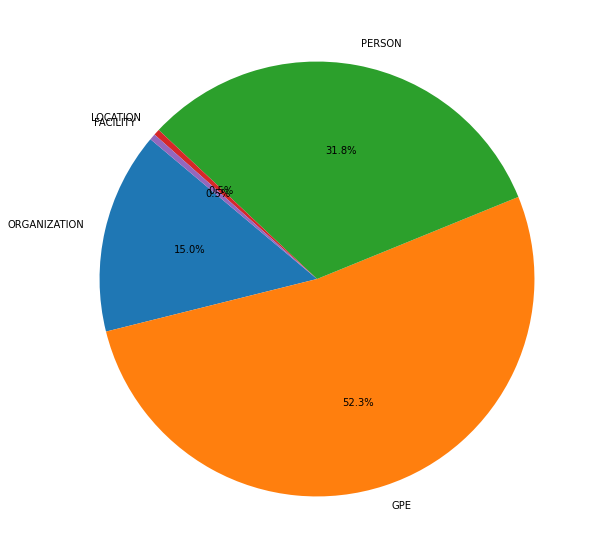

In [69]:
# Create a list of the values: values
values = [ner_categories.get(v) for v in labels]

# Create the pie chart
fig = plt.figure(figsize=(10, 10))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.show()

### Stanford library with NLTK

<pre>
Possible Answers

A normal installation of NLTK.

An installation of the Stanford Java Library.

Both NLTK and an installation of the Stanford Java Library.

<b>NLTK, the Stanford Java Libraries and some environment variables to help with integration.</b>

</pre>

## Introduction to SpaCy

### Comparing NLTK with spaCy NER

<div class=""><p>Using the same text you used in the first exercise of this chapter, you'll now see the results using spaCy's NER annotator. How will they compare?</p>
<p>The article has been pre-loaded as <code>article</code>. To minimize execution times, you'll be asked to specify the keyword arguments <code>tagger=False, parser=False, matcher=False</code> when loading the spaCy model, because you only care about the <code>entity</code> in this exercise.</p></div>

In [76]:
article = '\ufeffThe taxi-hailing company Uber brings into very sharp focus the question of whether corporations can be said to have a moral character. If any human being were to behave with the single-minded and ruthless greed of the company, we would consider them sociopathic. Uber wanted to know as much as possible about the people who use its service, and those who don’t. It has an arrangement with unroll.me, a company which offered a free service for unsubscribing from junk mail, to buy the contacts unroll.me customers had had with rival taxi companies. Even if their email was notionally anonymised, this use of it was not something the users had bargained for. Beyond that, it keeps track of the phones that have been used to summon its services even after the original owner has sold them, attempting this with Apple’s phones even thought it is forbidden by the company.\r\n\r\n\r\nUber has also tweaked its software so that regulatory agencies that the company regarded as hostile would, when they tried to hire a driver, be given false reports about the location of its cars. Uber management booked and then cancelled rides with a rival taxi-hailing company which took their vehicles out of circulation. Uber deny this was the intention. The punishment for this behaviour was negligible. Uber promised not to use this “greyball” software against law enforcement – one wonders what would happen to someone carrying a knife who promised never to stab a policeman with it. Travis Kalanick of Uber got a personal dressing down from Tim Cook, who runs Apple, but the company did not prohibit the use of the app. Too much money was at stake for that.\r\n\r\n\r\nMillions of people around the world value the cheapness and convenience of Uber’s rides too much to care about the lack of drivers’ rights or pay. Many of the users themselves are not much richer than the drivers. The “sharing economy” encourages the insecure and exploited to exploit others equally insecure to the profit of a tiny clique of billionaires. Silicon Valley’s culture seems hostile to humane and democratic values. The outgoing CEO of Yahoo, Marissa Mayer, who is widely judged to have been a failure, is likely to get a $186m payout. This may not be a cause for panic, any more than the previous hero worship should have been a cause for euphoria. Yet there’s an urgent political task to tame these companies, to ensure they are punished when they break the law, that they pay their taxes fairly and that they behave responsibly.'

Instructions
<ul>
<li>Import <code>spacy</code>.</li>
<li>Load the <code>'en'</code> model using <code>spacy.load()</code>. Specify the additional keyword arguments <code>tagger=False, parser=False, matcher=False</code>.</li>
<li>Create a <code>spacy</code> document object by passing <code>article</code> into <code>nlp()</code>.</li>
<li>Using <code>ent</code> as your iterator variable, iterate over the entities of <code>doc</code> and print out the labels (<code>ent.label_</code>) and text (<code>ent.text</code>).</li>
</ul>

In [79]:
# Import spacy
import spacy

# Instantiate the English model: nlp
nlp = spacy.load('en', tagger=False, parser=False, matcher=False)

# Create a new document: doc
doc = nlp(article)

# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)


ORG Uber
PERSON Uber
ORG unroll.me
ORG Apple
PERSON Travis Kalanick
PERSON Uber
PERSON Tim Cook
ORG Apple
CARDINAL Millions
PERSON Uber
LOC Silicon Valley
ORG Yahoo
PERSON Marissa Mayer
MONEY $186m


### spaCy NER Categories

<p>Which are the <em>extra</em> categories that <code>spacy</code> uses compared to <code>nltk</code> in its named-entity recognition?</p>

<pre>
Possible Answers

GPE, PERSON, MONEY

ORGANIZATION, WORKOFART

<b>NORP, CARDINAL, MONEY, WORKOFART, LANGUAGE, EVENT</b>

EVENT_LOCATION, FIGURE
</pre>

### French NER with polyglot I

<div class=""><p>In this exercise and the next, you'll use the <code>polyglot</code> library to identify French entities. The library functions slightly differently than <code>spacy</code>, so you'll use a few of the new things you learned in the last video to display the named entity text and category.</p>
<p>You have access to the full article string in <code>article</code>. Additionally, the <code>Text</code> class of <code>polyglot</code> has been imported from <code>polyglot.text</code>.</p></div>

In [97]:
!pip install polyglot
!pip install PyICU
!pip install pycld2
!pip install Morfessor

!polyglot download embeddings2.fr
!polyglot download ner2.fr

from polyglot.text import Text

article = "\ufeffédition abonné\r\n\r\n\r\nDans une tribune au « Monde », l’universitaire Charles Cuvelliez estime que le fantasme d’un remplacement de l’homme par l’algorithme et le robot repose sur un malentendu.\r\n\r\n\r\nLe Monde | 10.05.2017 à 06h44 • Mis à jour le 10.05.2017 à 09h47 | Par Charles Cuvelliez (Professeur à l’Ecole polytechnique de l'université libre de Bruxelles)\r\n\r\n\r\nTRIBUNE. L’usage morbide, par certains, de Facebook Live a amené son fondateur à annoncer précipitamment le recrutement de 3 000 modérateurs supplémentaires. Il est vrai que l’intelligence artificielle (IA) est bien en peine de reconnaître des contenus violents, surtout diffusés en direct.\r\n\r\n\r\nLe quotidien affreux de ces modérateurs, contraints de visionner des horreurs à longueur de journée, mériterait pourtant qu’on les remplace vite par des machines !\r\n\r\n\r\nL’IA ne peut pas tout, mais là où elle peut beaucoup, on la maudit, accusée de détruire nos emplois, de remplacer la convivialité humaine. Ce débat repose sur un malentendu.\r\n\r\n\r\nIl vient d’une définition de l’IA qui n’a, dans la réalité, jamais pu être mise en pratique : en 1955, elle était vue comme la création de programmes informatiques qui, quoi qu’on leur confie, le feraient un jour mieux que les humains. On pensait que toute caractéristique de l’intelligence humaine pourrait un jour être si précisément décrite qu’il suffirait d’une machine pour la simuler. Ce n’est pas vrai.\r\n\r\n\r\nAngoisses infondées\r\n\r\n\r\nComme le dit un récent Livre blanc sur la question (Pourquoi il ne faut pas avoir peur de l’Intelligence arti\xadficielle, Julien Maldonato, Deloitte, mars 2017), rien ne pourra remplacer un humain dans sa globalité.\r\n\r\n\r\nL’IA, c’est de l’apprentissage automatique doté d’un processus d’ajustement de modèles statistiques à des masses de données, explique l’auteur. Il s’agit d’un apprentissage sur des paramètres pour lesquels une vision humaine n’explique pas pourquoi ils marchent si bien dans un contexte donné.\r\n\r\n\r\nC’est aussi ce que dit le rapport de l’Office parlementaire d’évaluation des choix scientifiques et technologiques (« Pour une intelligence artificielle maîtrisée, utile et démystifiée », 29 mars 2017), pour qui ce côté « boîte noire » explique des angoisses infondées. Ethiquement, se fonder sur l’IA pour des tâches critiques sans bien comprendre le comment..."

[polyglot_data] Downloading package embeddings2.fr to
[polyglot_data]     /root/polyglot_data...
[polyglot_data]   Package embeddings2.fr is already up-to-date!
[polyglot_data] Downloading package ner2.fr to /root/polyglot_data...
[polyglot_data]   Package ner2.fr is already up-to-date!


Instructions
<ul>
<li>Using the article string in <code>article</code>, create a new <code>Text</code> object called <code>txt</code>.</li>
<li>Iterate over <code>txt.entities</code> and print each entity, <code>ent</code>.</li>
<li>Print the <code>type()</code> of <code>ent</code>.</li>
</ul>

In [98]:
# Create a new text object using Polyglot's Text class: txt
txt = Text(article)

# Print each of the entities found
for ent in txt.entities:
    print(ent)
    
# Print the type of ent
print(type(ent))

['Charles', 'Cuvelliez']
['Charles', 'Cuvelliez']
['Bruxelles']
['l’IA']
['Julien', 'Maldonato']
['Deloitte']
['Ethiquement']
['l’IA']
['.']
<class 'polyglot.text.Chunk'>


### French NER with polyglot II

<div class=""><p>Here, you'll complete the work you began in the previous exercise.</p>
<p>Your task is to use a list comprehension to create a list of tuples, in which the first element is the entity tag, and the second element is the full string of the entity text.</p></div>

Instructions
<ul>
<li>Use a list comprehension to create a list of tuples called <code>entities</code>. </li>
<li>The output expression of your list comprehension should be a tuple.<ul>
<li>The first element of each tuple is the entity tag, which you can access using its <code>.tag</code> attribute.</li>
<li>The second element is the full string of the entity text, which you can access using <code>.join(ent)</code>.</li></ul></li>
<li>Your iterator variable should be <code>ent</code>, and you should iterate over all of the entities of the <code>polyglot</code> <code>Text</code> object, <code>txt</code>.</li>
<li>Print <code>entities</code> to see what you've created.</li>
</ul>

In [99]:
# Create the list of tuples: entities
entities = [(ent.tag, ' '.join(ent)) for ent in txt.entities]

# Print entities
print(entities)

[('I-PER', 'Charles Cuvelliez'), ('I-PER', 'Charles Cuvelliez'), ('I-ORG', 'Bruxelles'), ('I-PER', 'l’IA'), ('I-PER', 'Julien Maldonato'), ('I-ORG', 'Deloitte'), ('I-PER', 'Ethiquement'), ('I-LOC', 'l’IA'), ('I-PER', '.')]


### Spanish NER with polyglot

<div class=""><p>You'll continue your exploration of <code>polyglot</code> now with some Spanish annotation. This article is not written by a newspaper, so it is your first example of a more blog-like text. How do you think that might compare when finding entities?</p>
<p>The <code>Text</code> object has been created as <code>txt</code>, and each entity has been printed, as you can see in the IPython Shell. </p>
<p>Your specific task is to determine how many of the entities contain the words <code>"Márquez"</code> or <code>"Gabo"</code> - these refer to the same person in different ways!</p></div>

In [104]:
!polyglot download ner2.es embeddings2.es

[polyglot_data] Downloading package ner2.es to /root/polyglot_data...
[polyglot_data] Downloading package embeddings2.es to
[polyglot_data]     /root/polyglot_data...
[polyglot_data]   Package embeddings2.es is already up-to-date!


In [115]:
article = "\ufeffLina del Castillo es profesora en el Instituto de Estudios Latinoamericanos Teresa Lozano Long (LLILAS) y el Departamento de Historia de la Universidad de Texas en Austin. Ella será la moderadora del panel “Los Mundos Políticos de Gabriel García Márquez” este viernes, Oct. 30, en el simposio Gabriel García Márquez: Vida y Legado.\r\n\r\n\r\nLIna del Castillo\r\n\r\n\r\nActualmente, sus investigaciones abarcan la intersección de cartografía, disputas a las demandas de tierra y recursos, y la formación del nación-estado colombiano durante la primera mitad del siglo IXX. Sus áreas de investigación incluyen varios aspectos de la historia latinoamericana, como la formación de Colombia en el siglo XVIII, la medicina, la tecnología, cuestiones de género, raza y clase social, y relaciones con los Estados Unidos.\r\n\r\n\r\nVer transmisión en vivo viernes 30 octubre, a las 2:15 p.m. CST.\r\n\r\n\r\nLa profesora del Castillo ha contribuido capítulos a los siguientes volúmenes: Mapping the Transition from Colony to Nation (17th Kenneth Nebenzahl, Jr. Lectures in the History of Cartography, The Newberry Library); Mapping Latin America: Space and Society, 1492–2000; Iberia and the Americas: Culture, Politics, and History; and Humboldt y otros viajeros en América Latina. Es autora de artículos que han sido publicados en Araucaria: Revista Iberoamericana de Filosofía, Política y Humanidades, Historia Crítica, y Terrae Incognitae: The Journal of the Society for the History of Discoveries.\r\n\r\n\r\nGarcía Márquez participó de las negociaciones entre el gobierno colombiano y la guerrilla. ¿Nos puede explicar la participación del autor?\r\n\r\n\r\nLas ‘misiones secretas’ de Gabriel García Márquez son en sí mismas materia novelesca. Después del triunfo de la revolución cubana, el Gabo, entonces periodista, cubrió el ascenso de Fidel Castro, quien le fascinó no sólo por la revolución política que lanzó sino por su pasión por la literatura. La amistad entre los dos sería profunda y duradera. Comenzando en los años, el Gabo llegó a creer que su conexión con Castro podría facilitar la paz entre la guerrilla y el gobierno colombianos. Tenía la razón.\r\n\r\n\r\nPara la década de los 80, el Gabo también se había hecho amigo del presidente colombiano Belisario Betancur, quien también era poeta reconocido. Después de la inauguración de Betancur en el 7 de agosto de 1982, la guerrilla M-19 propuso un diálogo. Con un número de miembros activos estimado entre 1.500 y 2.000, M-19 era el segundo grupo armado, después de las Fuerzas Armadas Revolucionarias de Colombia (FARC). El Gabo sabía que los líderes de M-19 tenían lazos cercanos con Cuba. Después del establecimiento de una comisión por la paz en septiembre 1982 por el Presidente Betancur, el Gabo arregló una reunión secreta en Cuba entre miembros de la comisión y miembros del M-19.\r\n\r\n\r\nDespués de incertidumbre y más violencia, M-19 por fin entregó sus armas el 8 de marzo de 1990. Betancur diría después que la paz se debía mucho a Gabriel García Márquez. El 7 de enero de 1999, en reconocimiento por sus esfuerzos anteriores, el Gabo fue el invitado de honor durante la inauguración de la zona desmililtarizada en San Vicente del Caguán, donde la presidencia de Andrés Patrana buscó hacer un acuerdo de paz con la FARC. La mediación de Gabo, junto con la disposición del presidente Pastrana hacia el diálogo, también trajo el Ejército de Liberación Nacional (ELN) a las negociaciones. García Márquez y su esposa, Mercedes Barcha, fueron testigos a la instalación formal de las negociaciones de paz con el ELN en La Habana en enero 2002. Desafortunadamente, ninguno de estos esfuerzos resultaron en una paz duradera con los grupos armados.\r\n\r\n\r\nGabo vivió suficiente para animar un regreso a las negociaciones en noviembre del 2012. Que estas negociaciones han sido en La Habana puede ser atribuido a la habilidad del Gabo a lo largo de su vida de tener influencia tanto en el corazón como el pensar de los políticos poderosos durante varias generaciones.\r\n\r\n\r\nCuban leader Fidel Castro, Gabriel García Márquez, and literary agent Carmen Balcells in Havana.\r\n\r\n\r\nCirca 1980-1990s. /\r\n\r\n\r\nFidel Castro, Gabriel García Márquez y agente literaria Carmen Balcells, en La Habana, c. 1980–1990.\r\n\r\n\r\n¿Cuál es su interés en participar en este simposio?\r\n\r\n\r\nAunque he vivido en los Estados Unidos desde la edad de cinco años, y la mayoría de mi educación ha sido aquí, siempre fui atraída a las historias de Colombia, país donde nací. Gabriel García Márquez contó las mejores, tal vez por que las contó después de haber estado separado por tanto tiempo de su país natal. Esta añoranza es algo con la cual yo me identifico.\r\n\r\n\r\nSiempre he tenido interés en aprender más sobre el Gabo, su vida y su escritura. Este simposio me ofrece la oportunidad de hacerlo. También estoy algo deslumbrada por la lista de invitados. Las conferencias magistrales serán ofrecidas por Salman Rushdie y Elena Poniatowska. Habrán docenas de participantes que reflejarán sobre la manera en que el Gabo tocó sus vidas, o directa o indirectamente. Personas que han sido conmovidas e inspiradas por sus escrituras hablarán de cómo el Gabo les ayudó a encontrar su propia voz. Profesores e investigadores que han dedicado sus vidas al estudio de su trabajo ofrecerán comentarios muy necesarios sobre lo que saben y lo que todavía queda por entender. O sea, el simposio indicará a los investigadores del futuro maneras de enriquecer e iluminar no sólo nuestro conocimiento de Gabriel García Márquez sino nuestro entendimiento de los mundos que habitó, cambió y creó.\r\n\r\n\r\n¿Puede dar unos ejemplos de la obra literaria de García Márquez que demuestren su interés por lo político?\r\n\r\n\r\nSu recuento novelizado de la devastación provocada por una empresa frutera en Macondo es algo que persigue la memoria colectiva. Hubo, claro, una lucha verdadera de los campesinos y trabajadores en la región colombiana en donde se cultivaba plátanos. Para finales del año 1928, esta lucha culminó en la huelga más grande en la historia de la región. Más de 25.000 trabajadores se enfrentaron con la United Fruit Company, y la huelga terminó con el masacre de los huelguistas por el ejercito colombiano del pueblo de Ciénaga, cerca de Santa Marta. García Márquez recreó este evento basado en sus memorias más antiguas junto con los recuerdos de sus padres y sus abuelos.\r\n\r\n\r\nDe Cien años de soledad (New York: Vintage Español, 2009), p. 366:\r\n\r\n\r\n“Cuando José Arcadio Segundo despertó estaba bocarriba en las tinieblas. … Dispuesto a dormir muchas horas, a salvo del terror y el horror, se acomodó del lado que menos le dolía, y sólo entonces descubrió que estaba acostado sobre los muertos.”\r\n\r\n\r\nEl recuento novelizado de García Márquez permanece como un punto de referencia primario en la historia de United Fruit en Colombia. En Macondo, las lluvias torrenciales hicieron desaparecer la evidencia del masacre, disolviendo las esperanzas de los que llevarían a la justicia a los responsables. Por lo tanto, la aniquilación de los huelguistas fue borrado de la memoria. Y, como dijeron las policías que respondieron a las quejas de los familiares de los desaparecidos, al fin de cuentas, Macondo era un lugar feliz. No pasó nada en Macondo, no pasa nada en Macondo y no pasará nada tampoco. De esta manera, el Gabo nos explica cómo hizo Macondo para borrar el evento de la memoria. Sin embargo, al contarnos sobre el masacre novelizado, el Gabo hace que la memoria del masacre de Ciénaga ocupa un gran lugar en la memoria colectiva colombiana. En nuestras mentes, José Arcadio Segundo sigue en el tren de medianoche que lleva a miles y miles de cadáveres uno encima del otro como tantos racimos del banano que acabarán tirados al mar. Ningún recuento periodístico podría provocar nuestra imaginación y nuestra memoria como este relato de García Márquez.\r\n\r\n\r\nContenido Relacionado\r\n\r\n\r\nLea más artículos sobre el archivo de Gabriel García Márquez\r\n\r\n\r\nReciba mensualmente las últimas noticias e información del Harry Ransom Center con eNews, nuestro correo electrónico mensual. ¡Suscríbase hoy!"
txt = Text(article)

Instructions
<ul>
<li>Iterate over all of the entities of <code>txt</code>, using <code>ent</code> as your iterator variable.</li>
<li>Check whether the entity contains <code>"Márquez"</code> or <code>"Gabo"</code>. If it does, increment <code>count</code>. <em>Don't forget to include the accented <code>á</code> in <code>"Márquez"</code>!</em></li>
<li>Hit 'Submit Answer' to see what percentage of entities refer to Gabriel García Márquez (aka Gabo).</li>
</ul>

In [116]:
# Initialize the count variable: count
count = 0

# Iterate over all the entities
for ent in txt.entities:
    # Check whether the entity contains 'Márquez' or 'Gabo'
    if 'Márquez' in ent or 'Gabo' in ent:
        # Increment count
        count+=1

# Print count
print(count)

# Calculate the percentage of entities that refer to "Gabo": percentage
percentage = count / len(txt.entities)
print(percentage)

29
0.29591836734693877
